In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
df = pd.DataFrame({"area":[2600,3000,3200,3600,4000],"price":[550000,565000,610000,680000,725000]})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


[]

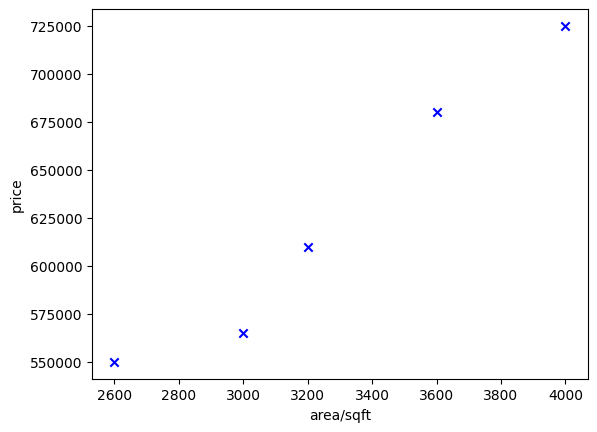

In [9]:
# Create a scatter plot, to see the distrubution of our dataset
%matplotlib inline
plt.scatter(df.area,df.price,color="b",marker="x")
plt.xlabel("area/sqft")
plt.ylabel("price")
plt.plot()

In [40]:
np.array(df.area)

array([2600, 3000, 3200, 3600, 4000])

In [46]:
reg = linear_model.LinearRegression()
reg.fit(np.array(df.area).reshape(-1,1),df.price)
reg.score(np.array(df.area).reshape(-1,1),df.price)

0.9584301138199486

In [81]:
reg.predict([[4300]])

array([764503.42465753])

In [48]:
predictions = []
for i in df.area:
    predictions.append(reg.predict([[i]]))
predictions = [i[0] for i in predictions]   
predictions

[533664.3835616438,
 587979.4520547945,
 615136.9863013698,
 669452.0547945206,
 723767.1232876712]

[]

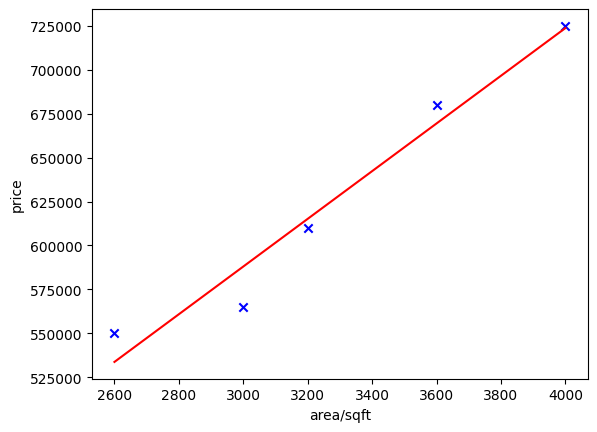

In [49]:
%matplotlib inline
plt.scatter(df.area,df.price,color="b",marker="x")
plt.plot(df.area,predictions,color="r")
plt.xlabel("area/sqft")
plt.ylabel("price")
plt.plot()

## Saving our model, in a file

> ### Using pickle

In [77]:
import pickle
with open("pickle_model","wb") as f:
    pickle.dump(reg,f)

In [78]:
with open("./pickle_model","rb") as f:
    model = pickle.load(f)

In [82]:
model.predict([[4300]])

array([764503.42465753])

In [90]:
model.coef_

array([135.78767123])

> ### Using joblib

In [84]:
import joblib

In [85]:
joblib.dump(reg,"model_joblib")

['model_joblib']

In [88]:
model_i2 = joblib.load("./model_joblib")
model_i2.predict([[4300]])

array([764503.42465753])

In [89]:
model_i2.coef_

array([135.78767123])

# Exercise

In [50]:
pci_df = pd.read_csv("./canada_per_capita_income.csv")
pci_df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [53]:
X_train = np.array(pci_df.year).reshape(-1,1)
y_train = np.array(pci_df["per capita income (US$)"])
y_train

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

[]

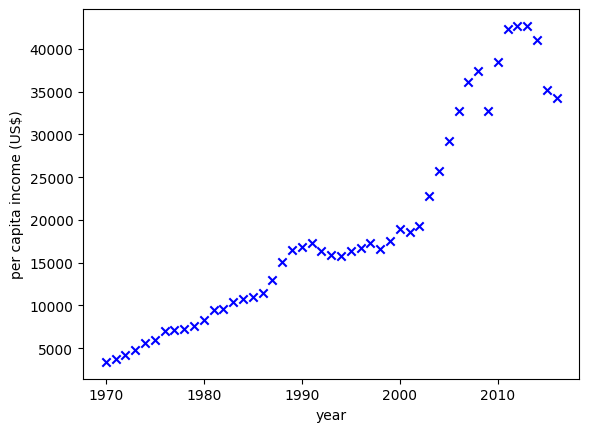

In [54]:
# Data visualization
plt.scatter(pci_df.year,pci_df["per capita income (US$)"],color="b",marker="x")
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.plot()

In [56]:
# training the model, using SKlearn

## training object
pci_model = linear_model.LinearRegression()

## fitting data
pci_model.fit(X_train,y_train)
## avaluating the model
pci_model.score(X_train,y_train)

0.890916917957032

In [58]:
w = pci_model.coef_[0]
b = pci_model.intercept_
print(f"w :{w} \n b : {b}")

w :828.4650752227104 
 b : -1632210.7578554575


In [61]:
def model(par):
    x=par
    return w*x + b
model(1970) 

new_prediction = list()
for i in pci_df.year:
    new_prediction.append(model(i))

In [75]:
j = 1980
# model(j) - pci_model.predict([[j]])[0]
print(f"prdiction => {model(j)}")
pci_df.loc[pci_df.year == j]


prdiction => 8150.091085509164


,year,per capita income (US$)
10,1980,8355.96812


[]

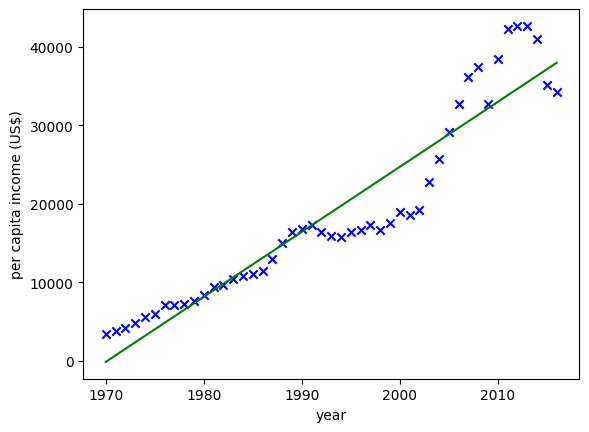

In [71]:
plt.scatter(pci_df.year,pci_df["per capita income (US$)"],color="b",marker="x")
plt.plot(pci_df.year,new_prediction,color="g")
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.plot()

# Saving my model into a file

In [76]:
import pickle